In [1]:
import pandas as pd
import numpy as np

# для парсинга данных с сайта
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# для обнаружения соответствий паттернам
import re

# для выполнения транслита
import pytils
from pytils.translit import translify

# для сложной сортировки
from operator import itemgetter

# для визуализации
import seaborn as sns
from matplotlib import pyplot as plt

# для записи в файлы формата .csv
import csv

### [*Ссылка*](#Выгрузка-кода-страницы-из-файла)
*(для пропуска авторизации)*

### Подготовка данных

In [3]:
with open('auth.txt', encoding="utf-8") as file_auth:
    text_auth = file_auth.read()
    file_auth.close()
login, password = [i.split(' ')[-1] for i in text_auth.split('\n')]

# данные для перехода по ссылке на сайт
URL = 'https://ai.leader-id.ru/contest/1/stage/1/activity/4/'
path = 'C:/Users/Жираслан/Downloads/chromedriver_win32 (1)/chromedriver.exe'

# открытие Google Chrome
driver = webdriver.Chrome(executable_path=path) 
driver.get(URL)

# авторизация
elem = driver.find_element_by_xpath('//*[@id="loginEmail"]')
elem.send_keys(login)
elem = driver.find_element_by_xpath('//*[@id="loginPassword"]')
elem.send_keys(password)

# подтверждение
element = driver.find_element_by_xpath('//*[@id="sbmt"]')
element.click();

In [4]:
# прокрутка ползунка для полного отображения стрницы

step = 0
e = []
i = 0
while (step < 20000):
    step = driver.execute_script("return document.body.scrollHeight;")
    driver.execute_script(f"window.scrollTo(0, {step});")
    e = driver.execute_script("return document.getElementsByClassName('wrapper__top_3ztMC')")
    if (len(e)%200==5 and len(e)>200):
        element = WebDriverWait(driver, 5000)
    if len(e)>=530:
        break
    i += 1

In [5]:
while (step < 40000):
    step = driver.execute_script("return document.body.scrollHeight;")
    driver.execute_script(f"window.scrollTo(0, {step});")
    e = driver.execute_script("return document.getElementsByClassName('wrapper__top_3ztMC')")
    if (len(e)%200==5 and len(e)>200):
        element = WebDriverWait(driver, 5000)
    if len(e)>=530:
        break
    i += 1

In [6]:
while (step < 60000):
    step = driver.execute_script("return document.body.scrollHeight;")
    driver.execute_script(f"window.scrollTo(0, {step});")
    e = driver.execute_script("return document.getElementsByClassName('wrapper__top_3ztMC')")
    if (len(e)%200==5 and len(e)>200):
        element = WebDriverWait(driver, 7000)
    if len(e)>=530:
        break
    i += 1

In [7]:
while (step < 71300):
    step = driver.execute_script("return document.body.scrollHeight;")
    driver.execute_script(f"window.scrollTo(0, {step});")
    e = driver.execute_script("return document.getElementsByClassName('wrapper__top_3ztMC')")
    if (len(e)%200==5 and len(e)>200):
        element = WebDriverWait(driver, 10000)
    if len(e)>=530:
        break
    i += 1

In [8]:
# сохранение кода страницы и запись его в файл 
text = driver.page_source
with open("page_code.txt", 'w', encoding="utf-8") as f:
    f.write(text)
f.close()

# закрытие Google Chrome
driver.quit()

#### Выгрузка кода страницы из файла

In [14]:
file = open('page_code.txt', encoding="utf-8")
text = file.read()
file.close()

In [15]:
# функция удаления единственной лишней ссылки, подходящей шаблону, не подходящей условию
def delete_excess():
    for i in range(len(links)):
        if links[i]=='https://2035.dev/':
            del links[i]

In [28]:
# использование регулярных выражений для извлечения ссылок, имен проектов-участников и количеств членов команды
reg_exp_links = 'a href="([hH]ttp.*?)"'
reg_exp_names = 'wrapper__top_3ztMC">\\n\s+(.*?)\\n'
reg_exp_number_of_members = '<\/svg> <span class="wrapper__count_.*?"> (\d)+[ \b]?<\/span>'

# поиск подходящих объектов
links = re.findall(reg_exp_links, text)
names = re.findall(reg_exp_names, text)
numbers = list(map(int, re.findall(reg_exp_number_of_members, text)))

delete_excess()

print(f'Общее количество:')
print(f'\tимен - {len(names)}.')
print(f'\tссылок - {len(links)}.')
print(f'\tучастников команд- {len(numbers)}.')


Общее количество:
	имен - 535.
	ссылок - 535.
	участников команд- 535.


In [29]:
# записи имен и ссылок проектов в файлы
with open('project_names.txt', 'w', encoding="utf-8") as file:
    for _ in names:
        file.write(_)
        file.write('\n')

with open('project_links.txt', 'w', encoding="utf-8") as file:
    for _ in links:
        file.write(_)
        file.write('\n')

К данному этапу были извлечены необходимые для анализа данные по целевым объектам - проектам-участникам, а именно:
* имена проектов;
* ссылки на сайты проектов;
* численности человек по проектам.

Полученная информация была выведена в следующие файлы:
1. **project_names.txt** (имена проектов);
2. **project_links.txt** (ссылки на сайты проектов);

### Выявление самых популярных доменных зон

In [30]:
# фильтрация элементов отобранного домена
def check_on_digits(list):
    a = None
    a = []
    for i in a:
        if (ord(i)>48 and ord(i)<58):
            return 0
    return 1

In [32]:
# регулярные выражения для доменов (верхнего уровня)
domains = []
domain_reg_exp = '\.(.\w+)'
for _ in links:
    if '.ai.' in _:
        domains.append('ai')
    elif '.net.' in _:
        domains.append('net')
    elif '.io.' in _:
        domains.append('io')
    elif '.org.' in _:
        domains.append('org')
    elif '.team.' in _:
        domains.append('team')
    elif '.club.' in _:
        domains.append('club')
    elif '.html.' in _:
        domains.append('html')
    elif '.com.' in _:
        domains.append('com')
    elif '.ru.' in _:
        domains.append('ru')
    else:
        dom = re.findall(domain_reg_exp, _)
        if (check_on_digits(dom[-1])):
            domains.append(dom[-1])
        else:
            domains.append(dom[-2])

In [33]:
# запись информации в датафрейм
domain_quantity = {}
for i in domains:
    domain_quantity[i] = domains.count(i)
    
dom_sorted = sorted(domain_quantity.items(), key=itemgetter(1))
df_domains = pd.DataFrame(zip(['.'+i[0] for i in dom_sorted][::-1],
                             [i[1] for i in dom_sorted][::-1]),
                         columns=['domain', 'number'])
df_domains.head()

,domain,number
0,.ru,238
1,.com,157
2,.sk,18
3,.io,15
4,.ai,9


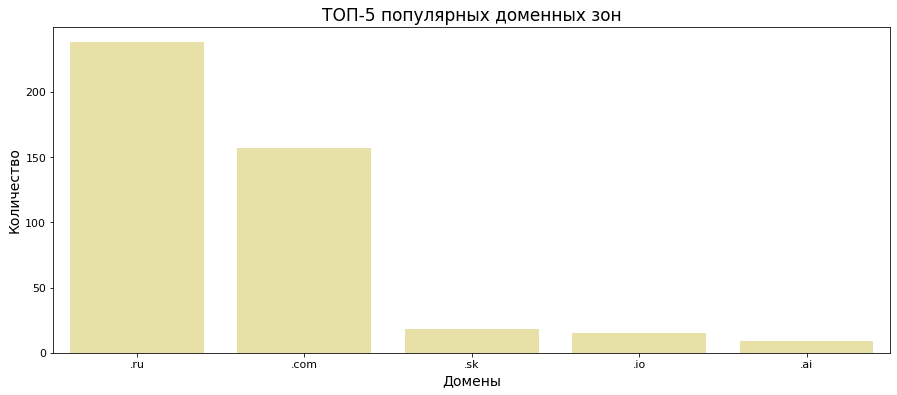

In [44]:
# диаграмма с информацией о ТОП-5 самых популярных доменах
plt.figure(figsize = (15, 6))
plt.title("ТОП-5 популярных доменных зон", fontsize=17)
plt.tick_params(labelsize=11)
sns.barplot(x=np.array(df_domains.head().domain), y=df_domains.head().number, alpha=0.85, color="khaki")
plt.ylabel("Количество", fontsize=14)
plt.xlabel("Домены", fontsize=14)
plt.show()

In [35]:
with open('project_info.csv', 'w', encoding="utf-8", newline='') as file:
    csv.writer(file).writerow(['Название', 'Ссылка', 'Домен', 'Кол-во участников'])
    for _ in range(len(names)):
        record = [names[_], links[_], domains[_], numbers[_]]
        csv.writer(file).writerow(record)
file.close()

Полученные результаты вполне ожидаемы, так как .ru - национальный верхний домен страны-организатора, .com - самый популярный международный домен крммерческих организаций, а остальные преимущественно представляют собой аббревиатуры известных определений в IT-отрасли (.net - от англ. "сеть", .ai - Artificial Intelligence, .io - Input.Output, и т.д.)

Также на этом этапе создаем файл **project_info.csv** для представления табличных данных с информацией об именах, ссылках, доменных зонах и численносей участников проектов.

### Определение количества проектов, названия которых совпадает с названиями сайта.

In [36]:
# лишние символы
non_regular_syms = [i for i in text if len(str(i.encode("utf-8")))>14]

# формирование массива с именами проектов, входящих в ссылки
links = [links[i].lower() for i in range(len(links))]
names = [names[i].lower() for i in range(len(names))]
coincedences = []

for i in range(len(names)):
    for _ in names[i]:
        if _ in non_regular_syms:
            names[i] = names[i].replace(_, "")
    for j in translify(names[i]).split(' '):
        if (j in links[i] and len(j)!=1 and j!='' and j not in coincedences):
            if '.' in j:
                j = j[:j.index('.')]
            coincedences.append(j)
            break
print(f'Проектов, названия которых совпадают с названиями сайта - {len(coincedences)}.')

Проектов, названия которых совпадают с названиями сайта - 120.


In [38]:
# запись этого массива в файл
with open('names_in links.txt', 'w', encoding="utf-8") as file:
    for _ in coincedences:
        file.write(_)
        file.write('\n')
file.close()

Таким образом, с помощью транслита имен проектов и их деления удалось вычислить число вхождений имен в сайты.

### Распределение количества участников в одной команде

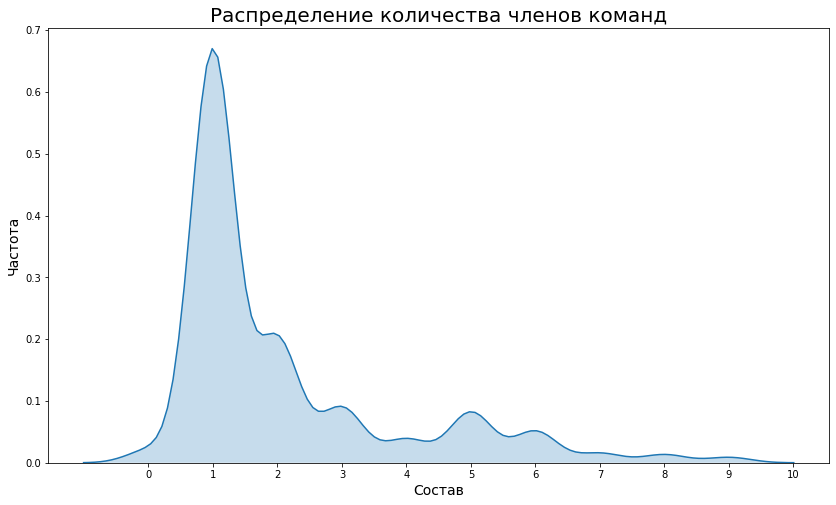

In [41]:
# гистограмма для визуализации
plt.figure(figsize = (14, 8))
sns_plot = sns.kdeplot(numbers, shade=True)
plt.title('Распределение количества членов команд', fontsize=20)
plt.xticks(range(11))
plt.xlabel('Состав', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.show()

Гистограмма распределения  свидетельствует о бимодальном распрделении - то есть, у нас 2 выраженных максимума: при количестве участников, равном 1, и равном 5. Посмотрим, какую информацию могут дать нам чемпионы - первые в списке лидерборда.

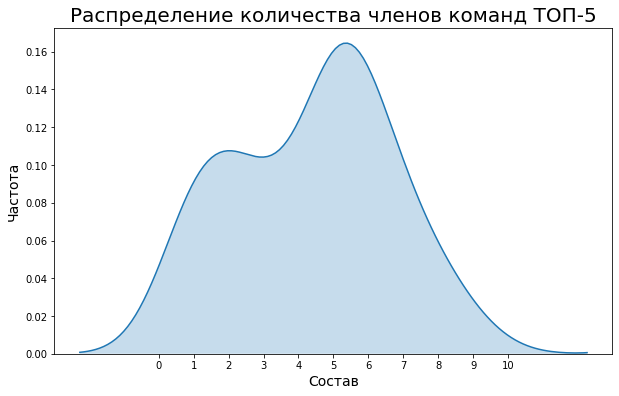

In [46]:
plt.figure(figsize = (10, 6))
sns_plot = sns.kdeplot(numbers[:50], shade=True)
plt.title('Распределение количества членов команд ТОП-5', fontsize=20)
plt.xticks(range(11))
plt.xlabel('Состав', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.show()

Как показывает визуализация, наиболее успешны команды, в которых от 5-6 человек. Видимо, это облегчает задачу участникам, так как позволяет оптимально делегировать обязанности внутри проекта (в отличие о случаев, где все приходится делать небольшому числу исполнителей) и при этом не делить их на слишком незначительные роли (как если бы это было у больших составов).

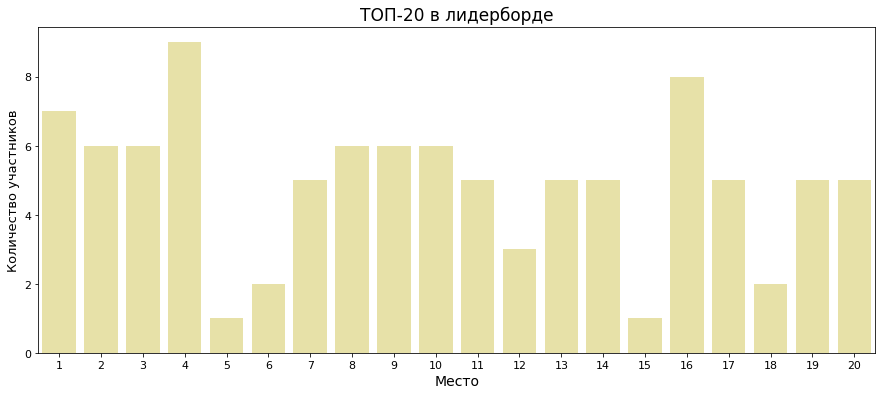

In [47]:
plt.figure(figsize = (15, 6))
plt.title("ТОП-20 в лидерборде", fontsize=17)
plt.tick_params(labelsize=11)
sns.barplot(x=[i for i in range(1, 21)], y=list(map(str, numbers[:20])), alpha=0.85, color="khaki")
plt.ylabel("Количество участников", fontsize=13)
plt.xlabel("Место", fontsize=14)
plt.show()

Как видим, из 20 лучших команд y 5 по 6 участников, у 7 по 5 участников. Таким образом, можно с уверенностью утверждать, что зависимость успеха команды значительно зависит от количества участников; наиболее оптимальный размер команды 5-6 составляет человек.